In [ ]:
"""
    Víctor López, NIUB: 20649182
    Èlia García, NIUB: 20723010
    Grup: 06
"""

# Pràctica 1:

Nom dels alumnes del grup: Víctor López i Èlia Garcia

# Anàlisi exploratòria de dades (EDA) & ús d'eines avançades de Python

L'**anàlisi exploratòria de dades** (EDA, per les seves sigles en anglès, *Exploratory Data Analysis*) és un procés crític en la ciència de les dades que implica **explorar, resumir i visualitzar** les dades per a entendre les seves característiques principals. L'objectiu principal de l'EDA és revelar patrons, tendències i anomalies a partir de les dades, sense fer suposicions massa específiques o construir models massa complexes.

Aquí teniu alguns dels elements més importants de l'anàlisi exploratòria de dades:

+ **Visualització de dades**: A través de gràfics i gràfiques, es representen les dades per a veure distribucions, tendències i relacions. Això pot incloure histogrames, gràfics de barres, diagrames de dispersió, gràfics de caixa, etc.

+ **Estadístiques descriptives**: Es calculen estadístiques com la mitjana, la mediana, la desviació estàndard i altres mesures resum per a descriure les característiques bàsiques de les variables.

+ **Detecció d'anomalies**: Es busca identificar valors atípics o anòmals que puguin indicar errors o situacions especials en les dades.

+ **Imputació de dades faltants**: Si les dades tenen buits o valors faltants, es pot decidir com omplir aquests buits de manera adequada.

+ **Exploració de relacions**: Es busquen correlacions i relacions entre les diferents variables de les dades per a identificar connexions i dependencies.

+ **Agrupació de dades**: Es divideixen les dades en subconjunts basats en certes característiques per a analitzar-les més detingudament.

+ **Transformació de dades**: Es poden aplicar transformacions a les dades per a fer-les més adequades per a anàlisi posterior, com l'estandardització o la normalització.

* **Selecció de característiques**: Si es treballa amb un conjunt de dades amb moltes variables, es pot realitzar una selecció de característiques per a reduir la complexitat i millorar l'eficiència de l'anàlisi.

Python ofereix una àmplia gamma d'eines i biblioteques per a realitzar l'anàlisi exploratòria de dades (EDA). Algunes de les biblioteques més populars i útils són les següents:

+ **NumPy**: NumPy és una biblioteca fonamental per a la computació científica en Python. Proporciona funcionalitats per a treballar amb matrius i vectors, la qual cosa és essencial per a l'anàlisi de dades.

+ **Pandas**: Pandas és una biblioteca molt popular per a l'anàlisi de dades que ofereix estructures de dades com DataFrame i Series, que faciliten la manipulació i anàlisi de dades tabulars. Podeu utilitzar Pandas per a carregar, netejar i explorar les dades.

+ **Matplotlib**: Matplotlib és una biblioteca per a la visualització de dades que us permet crear una àmplia gamma de gràfics i gràfiques personalitzades. És ideal per a crear histogrames, diagrames de dispersió, gràfics de barres i moltes altres representacions gràfiques.

+ **Scipy**: SciPy és una biblioteca que amplia les funcionalitats de NumPy i proporciona eines addicionals per a l'anàlisi científic, inclosos estadístics i mètodes d'optimització.

+ **Scikit-learn**: Si esteu interessats en l'aprenentatge automàtic, Scikit-learn és una biblioteca essencial que ofereix eines per a la classificació, regressió, agrupació i altres tasques d'aprenentatge automàtic. També conté eines per a la selecció de característiques.

+ **Seaborn**: Seaborn és una biblioteca de visualització de dades basada en Matplotlib que simplifica la creació de gràfics estadístics atractius i informatius. És especialment útil per a la visualització de relacions i tendències en les dades.

## 0. Objectiu de la pràctica

L'**objectiu d'aquesta pràctica** és aprendre com fer una exploració sobre un conjunt de dades real, que al final ens permeti obtenir la resposta a diverses preguntes.

En aquesta pràctica explorarem les dades dels trajectes dels **taxis grocs de la ciutat de Nova York** durant varios anys.

En finalitzar aquesta pràctica, haureu de ser capaços de respondre la pregunta següent de forma detallada:

- **Com va afectar la pandèmia de la Covid l'ús dels taxis a Nova York?**

Pere respondre aquesta pregunta tant genèrica, ho descomposarem en preguntes més concretes:

- Quina distribució d'encàrrecs segueixen els taxis i quina distància / durada tenen?
- Quines són les zones on m'és / menys taxis s'agafen?
- Quins horaris són els més usuals?
- Quins dies de la setmana i del mes s'utilitzen més?
- Etc.

### Instal·lació i importació de les llibreries necessàries

A més a més de les llibreries comentades, farem servir aquests mòduls de Python:

+ **PyArrow**: PyArrow és una biblioteca de Python que es fa servir per a l'intercanvi eficient de dades entre Python i altres llenguatges de programació, especialment C++ i Java. Aquesta biblioteca es desenvolupa com a part del projecte Apache Arrow, que és un projecte de codi obert dissenyat per a millorar el rendiment i la interoperabilitat de l'analítica de dades i les tecnologies relacionades. PyArrow permet la creació i la manipulació eficient de dades en forma de taules i columnes. PyArrow ofereix suport per a l'estructura de dades coneguda com a "Table", que és similar a una taula o un quadern de dades en altres llenguatges. Aquesta estructura de dades facilita l'organització i la manipulació de dades tabulars.

In [ ]:
from platform import python_version
print(python_version())

3.10.12


In [ ]:

! pip install pyarrow

In [ ]:
import pandas as pd
import numpy as np
import urllib.request
import zipfile
import os
from tqdm.notebook import tqdm
import pyarrow.parquet as pq

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Descàrrega de dades

In [ ]:
# Variables globals: els anys que estudiarem
YEARS = [2019, 2020, 2021]

In [ ]:
# Descàrrega de les dades: Trip Record Data
# https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page

for year in tqdm(YEARS):
    if not os.path.exists(f'data/{year}'):
        os.makedirs(f'data/{year}', exist_ok=True)
        for month in tqdm(range(1, 13)):
            urllib.request.urlretrieve(f'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_{year}-{month:02d}.parquet', f'data/{year}/{month:02d}.parquet')

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

## 2. Neteja de dades

Per tal de tenir unes dades netes i útils, eliminarem totes aquells trajectes (files del conjunt de dades)  que continguin informació *corrupte*. Per exemple, cal verificar que no es dóna cap d'aquests casos:

- Presència de *missing data* (camps/columnes de les dades sense valor).
- L'hora de recollida és posterior a la finalització del trajecte.
- Les dades s'importen per mes i any. Són coherents els valors que contenen les dades?
- Hi ha viatges amb un nombre absurd de passatgers?
- Hi ha viatges massa llargs o massa curts?
- Hi ha pagaments negatius?
- Etc.

A més a més, hem de considerar aspectes concrets d'aquestes dades:

+ Hi pot haver viatges impossibles segons la normativa:
    + [Més viatgers que els permesos](https://www1.nyc.gov/site/tlc/passengers/passenger-frequently-asked-questions.page) o [velocitats il·legals](https://www.speed-limits.com/newyork).
    + [Limit de persones permeses a un yellow taxicab](https://drive.google.com/file/d/1eiV7wdm7WrkRlM9bmekCRM6GY3Yq6GI2/view?usp=sharing)

De totes les columnes que tenen les dades, només cal fer servir les següents per contestar les preguntes:

- *tpep_pickup_datetime*: The date and time when the meter was engaged.
- *tpep_dropoff_datetime*: The date and time when the meter was disengaged.
- *Passenger_count*: The number of passengers in the vehicle.
- *Trip_distance*: The elapsed trip distance in miles reported by the taximeter.
- *PULocationID*: TLC Taxi Zone in which the taximeter was engaged
- *DOLocationID*: TLC Taxi Zone in which the taximeter was disengaged
- *Payment_type*: A numeric code signifying how the passenger paid for the trip.
    - 1= Credit card
    - 2= Cash
    - 3= No charge
    - 4= Dispute
    - 5= Unknown
    - 6= Voided trip
- *Fare_amount*: The time-and-distance fare calculated by the meter.
- *Total_amount*: The total amount charged to passengers.

In [ ]:
# Carreguem les dades a un dataframe de pandas
# Per agilitzar els càlculs i reduir el temps de càlcul durant el desenvolupament,
# eliminem les columnes que no són útils i treballem amb una mostra
# uniforme de les dades (1 fila de cada 100).

def load_table(year, month, sampling = 100):
    """
    Funció que llegeix les dades descarregades i les converteix a un DataFrame
    """
    data = pq.read_table(f'data/{year}/{str(month).zfill(2)}.parquet').to_pandas()
    required_data = ['tpep_pickup_datetime',
                 'tpep_dropoff_datetime',
                 'passenger_count',
                 'trip_distance',
                 'PULocationID',
                 'DOLocationID',
                 'payment_type',
                 'fare_amount',
                 'total_amount']
    return data[required_data][::sampling]

# explorem una mica les dades
test = load_table(2019, 1)
test.shape

(76967, 9)

In [ ]:
test.tail()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,total_amount
7696200,2019-01-31 14:01:00,2019-01-31 15:08:00,NaN,16.32,36,21,0,59.15,62.7
7696300,2019-01-31 15:35:00,2019-01-31 15:55:00,NaN,4.96,18,220,0,26.31,32.5
7696400,2019-01-31 17:11:00,2019-01-31 18:05:00,NaN,14.78,107,130,0,50.69,60.0
7696500,2019-01-31 18:33:00,2019-01-31 18:58:00,NaN,8.80,107,69,0,39.45,43.0
7696600,2019-01-31 23:31:07,2019-01-31 23:51:40,NaN,9.17,140,47,0,43.45,46.5


###  Exercici A

+ Un cop llegides les dades a una taula de Pandas, implementa una funció que faci el procés de neteja que consideris necessari. Per determinar què és necessari, **explora** els valors que apareixen a cada columna del dataframe de Pandas i decideix què cal fer.

> *Nota: Les columnes `Datatime` són un subtipus de dades de Pandas anomenades `datetime`.  Busca com tractar de forma eficient aquest tipus de dades en Pandas.*

In [ ]:
def clean_data(data, year, month):
    """
    Neteja les dades del dataframe per a un mes i any específics.

    Aquesta funció elimina duplicats, valors nuls i altres dades invàlides. També
    valida les dates i els rangs dels valors de les columnes, com el nombre de passatgers,
    distància recorreguda i tipus de pagament.

    Paràmetres:
        data (pd.DataFrame): El dataframe que conté les dades dels viatges.
        year (int): L'any per al qual es volen netejar les dades.
        month (int): El mes per al qual es volen netejar les dades.

    Retorn:
        data (pd.DataFrame):
          El dataframe netejat amb els filtres aplicats.
    """
    # Eliminar duplicats
    data = data.drop_duplicates()

    # Eliminar files amb valors nuls
    data = data.dropna()

    # Convertir les columnes de data a tipus datetime
    data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
    data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])

    # Filtrar viatges on la data de recollida és anterior a la de deixada
    data = data[data['tpep_pickup_datetime'] < data['tpep_dropoff_datetime']]

    # Filtrar per l'any i mes específics
    data = data[(data['tpep_pickup_datetime'].dt.year == year) &
                (data['tpep_pickup_datetime'].dt.month == month)]

    # Filtrar per rangs vàlids de passatgers, distància i pagaments
    data = data[
        (data['passenger_count'].between(1, 5)) &  # Nombre de passatgers entre 1 i 5
        (data['trip_distance'].between(0.5, 100)) &  # Distància entre 0.5 i 100 km
        (data['fare_amount'] >= 0) &  # Fare pagament no negatiu
        (data['total_amount'] >= 0) &  # Pagament total no negatiu
        (data['fare_amount'] <= data['total_amount']) &  # Fare menor o igual al total
        (data['payment_type'].between(1, 5))  # Tipus de pagament entre 1 i 5
    ]

    # Filtrar per Location IDs vàlids
    data = data[(data['PULocationID'].between(1, 265)) &
                (data['DOLocationID'].between(1, 265))]

    return data

test = clean_data(test, 2019,1)
test.shape

(69201, 9)

In [ ]:
test.tail()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,total_amount
7667500,2019-01-31 23:58:14,2019-02-01 00:04:05,2.0,0.53,230,48,1,5.5,8.84
7667600,2019-01-31 23:13:39,2019-01-31 23:19:36,1.0,2.19,142,151,1,8.0,11.16
7667700,2019-01-31 18:44:20,2019-01-31 18:50:12,1.0,0.59,161,162,2,5.5,6.80
7667800,2019-01-31 23:26:07,2019-02-01 00:02:33,1.0,4.02,161,226,1,24.0,29.30
7667900,2019-01-31 23:32:17,2019-01-31 23:47:35,2.0,2.52,164,113,1,11.5,14.00


###  Exercici B

+ Escriu una funció que transformi la taula original a una nova taula, més adequada per tal de dur a terme l'exploració necessària. Podeu afegir columnes addicionals, precalcular valors, etc.

> Per exemple, podem transformar les dades per treballar amb les unitats de kilòmetres i hores per a representar les durades, distàncies i velocitats del trajecte. El motiu és, per una banda, que estem familiaritzades amb el Sistema Internacional d'Unitats (d'aquí el canvi de milles a km). I per altra, optar pels km i no pels metres degut a l'ordre de magnitud de les dades.

> Un cop tenim les dades normalitzades i enriquides hem de pensar en la neteja una altra vegada. Per exemple: Eliminar aquelles files que tinguin velocitat max excedeixi limit permès per llei https://www.speed-limits.com/newyork

In [ ]:
def post_processing(data):
    """
    Aplica postprocessament a les dades de viatges de taxi.

    Aquesta funció realitza diverses operacions de neteja i transformació sobre el
    conjunt de dades proporcionat, incloent-hi la conversió d'unitats, l'eliminació
    de valors extrems i el càlcul de nous atributs com la duració del trajecte i
    la velocitat mitjana.

    Paràmetres:
        data (pd.DataFrame): El dataframe que conté les dades dels viatges de taxi.

    Retorn:
        data (pd.DataFrame):
          Un nou dataframe amb les dades processades, que inclouen
          només els viatges vàlids després del postprocessament.
    """
    # Afegim la columna de duració del trajecte i esborrem els viatges que superen 1 dia de duració
    data['trip_duration'] = (data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']).dt.total_seconds() / 3600

    # Esborrem els viatges que tenen una durada >= 1 dia
    data = data[data['trip_duration'] < 24]

    # Convertim les distàncies de milles a quilòmetres
    conversio = 1.60934  # 1 milla = 1,60934 km
    data['trip_distance'] *= conversio  # [Km]

    # Calculem la velocitat mitjana en Km/h
    data['speed'] = data['trip_distance'] / data['trip_duration']  # [Km/h]

    # Esborrem els viatges que superen la velocitat màxima de Nova York (65 mph ≈ 104.585 km/h)
    # i els que tenen velocitats negatives o nul·les
    data = data[(data['speed'] < 104.585) & (data['speed'] > 0)]

    return data


test = post_processing(test)
test.shape

(69136, 11)

In [ ]:
test.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,total_amount,trip_duration,speed
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,2.414010,151,239,1,7.0,9.95,0.111111,21.726090
100,2019-01-01 00:43:00,2019-01-01 00:52:16,1.0,2.574944,238,236,1,8.5,12.70,0.154444,16.672299
200,2019-01-01 00:30:01,2019-01-01 00:33:50,1.0,1.110445,143,239,2,5.0,6.30,0.063611,17.456771
300,2019-01-01 00:34:48,2019-01-01 00:46:16,2.0,3.234773,236,74,1,10.0,12.88,0.191111,16.926140
400,2019-01-01 00:49:44,2019-01-01 01:07:18,2.0,5.632690,263,164,1,14.5,18.95,0.292778,19.238789


Amb això podem crear un nou dataset (una única taula) que contingui tota la informació dels anys: 2019, 2020, 2021.

## 3. Visualització de dades anuals

Començarem l'anàlisi de les dades amb la següent pregunta: **S'ha incrementat o ha disminuït amb la covid la quantitat de viatges anuals fets amb taxis?**

Per fer-ho, n'hi ha prou amb crear una figura de barres on es visualitzin la quantitat de viatges per any.

### Exercici C

+ Escriu una funció basada en `matplotlib` que generi aquesta gràfica.

In [ ]:
df = pd.concat([clean_data(load_table(year, month), year, month)
                for year in tqdm(YEARS)
                for month in tqdm(range(1, 13), leave = False)],
                ignore_index=True, sort=False)
df = post_processing(df)
df.shape

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

<ipython-input-10-a2b81291941a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
<ipython-input-10-a2b81291941a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tpep_dropoff_datetime']= pd.to_datetime(data['tpep_dropoff_datetime'])


  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

(1244451, 11)

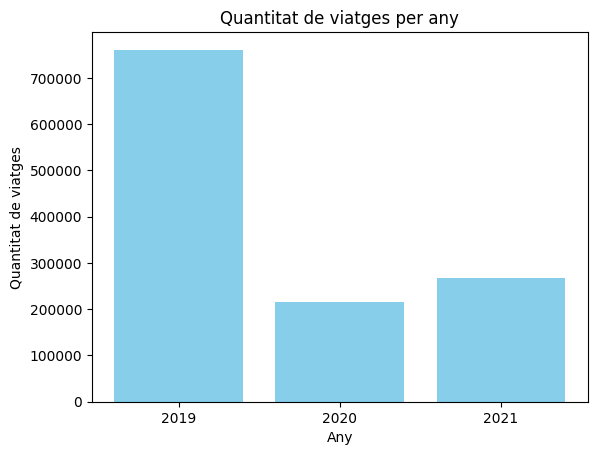

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def bar_plot(df, column, xlabel, ylabel, title):
    """
    Crea un gràfic de barres a partir d'un DataFrame, mostrant la quantitat d'elements per un valor temporal especificat.

    Aquesta funció genera un gràfic de barres basat en la columna de dates d'un DataFrame,
    agrupant per un atribut temporal específic per a representar la distribució.

    Parameters
    ----------
    df : pandas.DataFrame
        El DataFrame que conté les dades.
    column : str
        L'atribut temporal utilitzat per agrupar les dades .
    xlabel : str
        L'etiqueta per a l'eix x.
    ylabel : str
        L'etiqueta per a l'eix y.
    title : str
        El títol del gràfic.

    Returns
    -------
    None
        La funció no retorna res, només mostra el gràfic.
    """

    for year in YEARS:
        # Converteix la columna 'tpep_pickup_datetime' a tipus datetime
        # i accedeix a l'atribut temporal especificat per 'column'.
        # Comptabilitza la freqüència de cada valor i els ordena per index.
        year_data = getattr(
            pd.to_datetime(df['tpep_pickup_datetime']).dt,
            column
        ).value_counts().sort_index()

        # Configura les etiquetes de l'eix x amb els valors únics de l'índex.
        plt.xticks(year_data.index)

    # Dibuixa el gràfic de barres utilitzant els índexs com a valors de l'eix x
    # i les freqüències com a valors de l'eix y.
    plt.bar(
        year_data.index,
        year_data.values,
        color='skyblue'
    )

    # Assigna el títol al gràfic de barres.
    plt.title(title)

    # Afegeix l'etiqueta per a l'eix x.
    plt.xlabel(xlabel)

    # Afegeix l'etiqueta per a l'eix y.
    plt.ylabel(ylabel)

    # Mostra el gràfic generat.
    plt.show()

bar_plot(
    df,
    'year',
    'Any',
    'Quantitat de viatges',
    'Quantitat de viatges per any'
)



+ Visualitza ara en tres gràfiques, el nombre de viatges per mesos de cada any, fent servir la funció anterior.

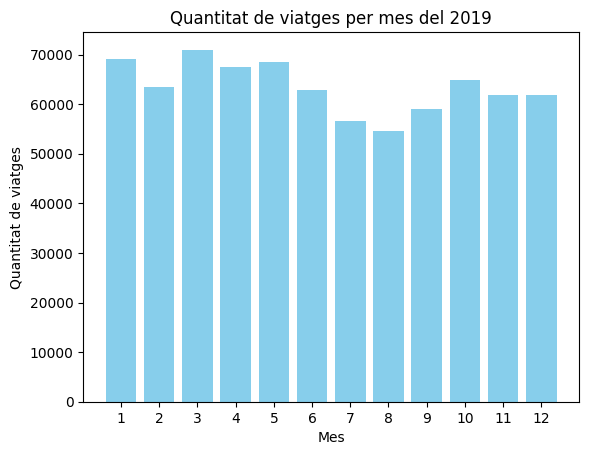

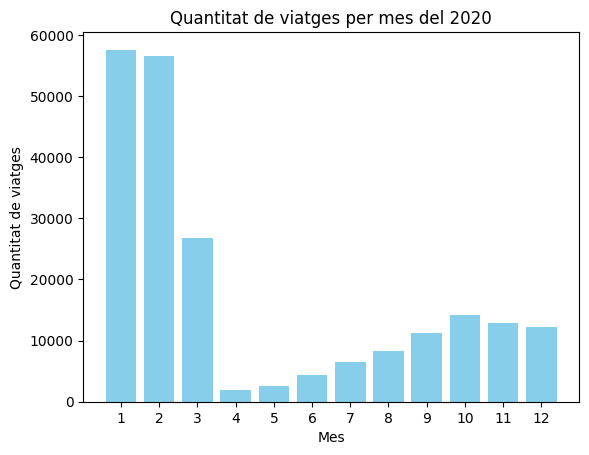

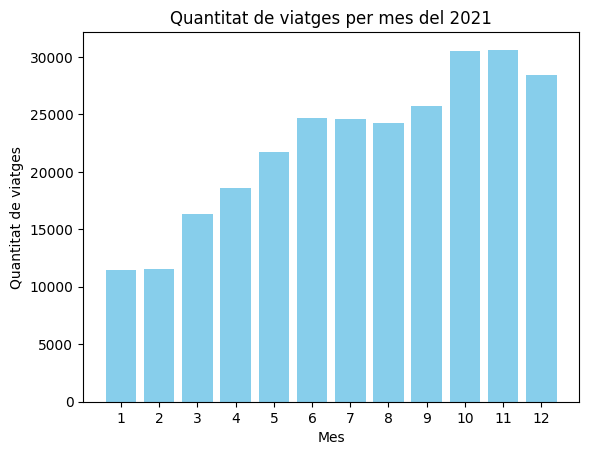

In [ ]:
for year in YEARS:
    bar_plot(df[df['tpep_pickup_datetime'].dt.year == year],
         'month',
         'Mes',
         'Quantitat de viatges',
         'Quantitat de viatges per mes del '+str(year))



+ Pregunta:
    + És el comportament que esperàveu? Explica la teva interpretació de les dades tenint en compte el que va passar al món durant aquests anys.

    

> En el gràfic del 2019, podem observar una tendència constant en el nombre de viatges durant tots els mesos de l'any, ja que encara no hi havia cap impacte significatiu de la COVID-19. El flux de viatgers es manté estable, com es podria esperar en un any sense restriccions globals.

> En canvi, en el gràfic del 2020, veiem una forta caiguda en el nombre de viatges a partir del mes de març, coincidint amb l'inici de les restriccions per la pandèmia. Els dos primers mesos mostren un patró similar al de 2019, però a partir de març es reflecteix clarament l'impacte de la pandèmia, amb una baixada pronunciada a l'abril, pràcticament fins a zero. Aquesta caiguda és conseqüència de les estrictes mesures de confinament i la reducció dràstica de la mobilitat. Els pocs viatges que es fan durant la resta de l'any probablement són viatges locals realitzats per residents de Nova York, ja que el turisme internacional estava pràcticament paralitzat.

> A partir del 2021, hi ha una recuperació progressiva en el nombre de viatges, amb un augment notable al llarg dels mesos. Aquest patró reflecteix la nova normalitat després de l'impacte inicial de la COVID-19, amb la reobertura gradual de les activitats i una recuperació del turisme i la mobilitat. Encara que el nombre de viatges no torna als nivells de 2019, la tendència mostra un creixement constant, a mesura que la situació sanitària millora i les restriccions es relaxen.


+ Visualitza **quants passatgers hi ha per taxi i per any**. Crea una figura **amb tres subfigures** (una per any) on es pugui veure el recompte de passatgers per any. Després repetiu el mateix gràfic visualitzant el % enlloc dels nombres ababsoluts (utilitzeu el paràmetre *norm = True*).

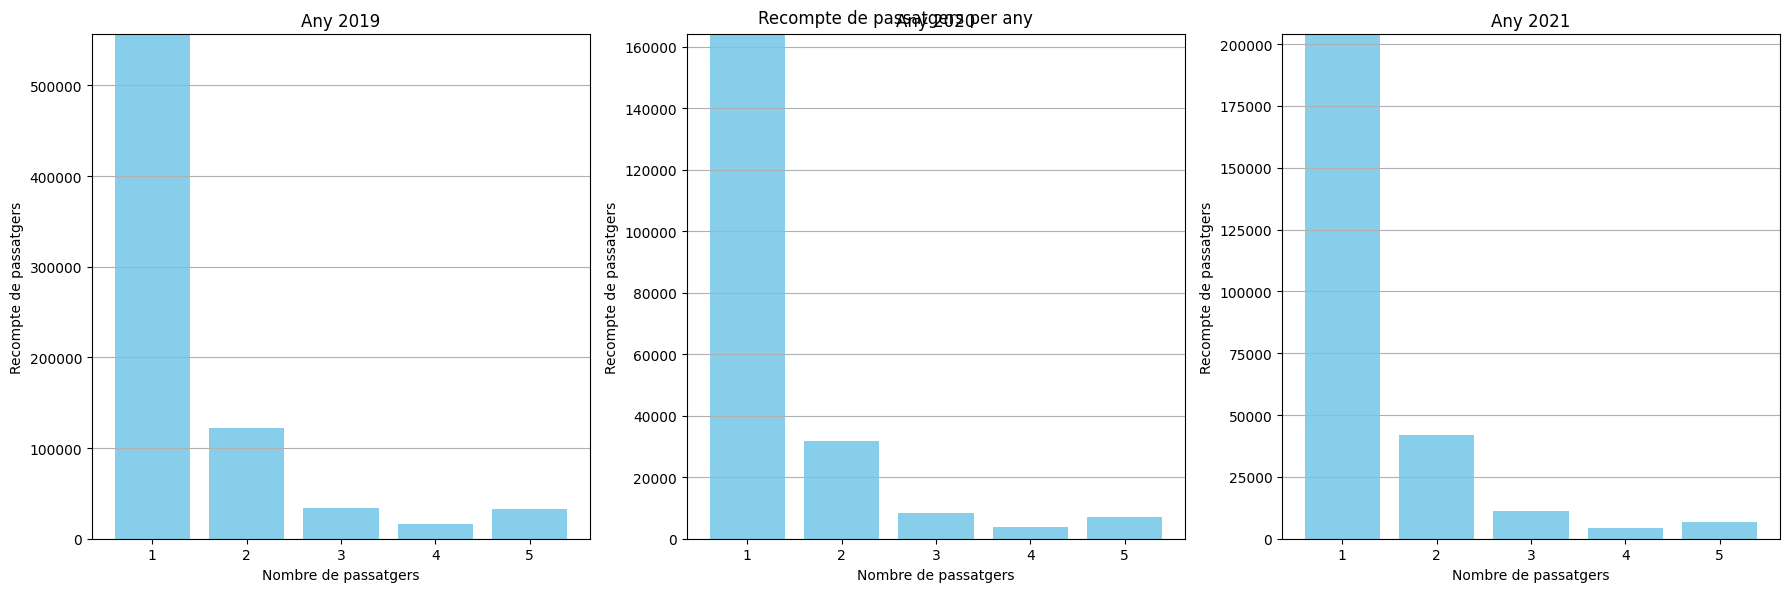

In [ ]:
def passengers_taxi_year(df, ylim, xlabel, ylabel, title, colName='passenger_count', norm=False):
    """
    Visualitza la quantitat de passatgers per taxi i per any.

    Genera un gràfic de barres per cada any en un conjunt de dades,
    mostrant la distribució de la quantitat de passatgers. També,
    pot normalitzar els valors per convertir-los en percentatges.

    Parameters
    ----------
    df : pandas.DataFrame
        El DataFrame amb les dades dels viatges.
    ylim : tuple
        El límit dels valors per l'eix y, especificat com (min, max).
    xlabel : str
        L'etiqueta de l'eix x.
    ylabel : str
        L'etiqueta de l'eix y.
    title : str
        El títol general del gràfic.
    colName : str, opcional
        El nom de la columna que conté el recompte de 'passatgers' (per defecte és 'passenger_count').
    norm : bool, opcional
        Si és True, els valors es normalitzen per mostrar percentatges (per defecte és False).

    Returns
    -------
    None
        La funció només mostra el gràfic.
    """

    plt.figure(figsize=(18, 6))  # Crea una figura de dimensions 18x6.

    for year in YEARS:
        # Filtra les dades per l'any actual.
        df_filtered = df[df['tpep_dropoff_datetime'].dt.year == year]
        # Calcula el recompte de passatgers per al colName especificat i els ordena.
        passenger_count = df_filtered[colName].value_counts().sort_index()

        if norm:
            # Si norm és True, normalitza els valors com a percentatges.
            passenger_count = (passenger_count / passenger_count.sum()) * 100

        # Afegeix un subgràfic per a l'any actual.
        plt.subplot(1, len(YEARS), YEARS.index(year) + 1)

        # Crea un gràfic de barres per a l'any actual.
        plt.bar(
            passenger_count.index,
            passenger_count.values,
            color='skyblue'
        )
        plt.title(f"Any {year}")  # Assigna el títol amb l'any corresponent.

        plt.xlabel(xlabel)  # Etiqueta de l'eix x.
        plt.ylabel(ylabel)  # Etiqueta de l'eix y.

        # Ajusta el límit de l'eix y si el màxim supera ylim.
        if max(passenger_count) > ylim[1]:
            plt.ylim((0, max(passenger_count)))
        else:
            plt.ylim(ylim)

        plt.xticks(passenger_count.index)  # Configura les etiquetes de l'eix x.
        plt.grid(axis='y')  # Afegeix una graella horitzontal.

    plt.tight_layout()  # Ajusta l'espai entre les subfigures.
    plt.suptitle(title)  # Assigna el títol general del gràfic.
    plt.show()  # Mostra el gràfic.

passengers_taxi_year(df,
                     (0, 60000),
                     'Nombre de passatgers',
                     'Recompte de passatgers',
                     'Recompte de passatgers per any')

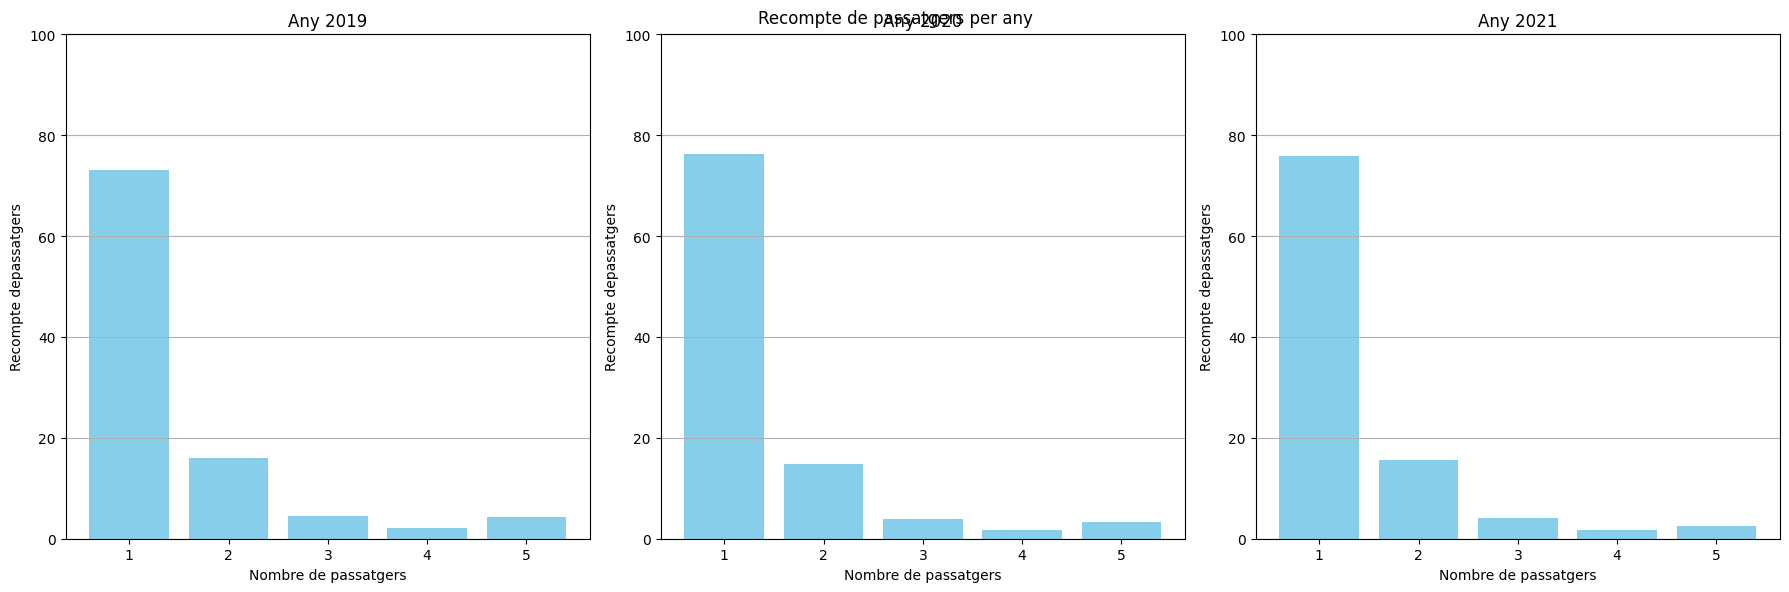

In [ ]:
passengers_taxi_year(df,
                     (0, 100),
                     'Nombre de passatgers',
                     'Recompte depassatgers',
                     'Recompte de passatgers per any',
                     norm = True)

+ Com descriurieu de forma **qualitativa** l'efecte de la covid sobre els taxis en base a l'anàlisi fet fins ara?
+ Podeu calcular de forma **quantitativa** la magnitud dels canvis que heu detectat? Escriviu una funció que calculi una sèrie d'indicadors quantitatius (per exemple, quin canvi percentual hi ha en el nombre de viatges d'una sola persona, la mitja de passatgers per viatge, etc.).

**> Respostes** \\
Durant aquests tres anys, es nota un canvi important en el nombre de viatges, sobretot quan comparem abans, durant i després de la pandèmia. A partir del març de 2020, el nombre de viatgers cau en picat amb les restriccions i el confinament. Al llarg del 2020 i el 2021, es veu com la cosa es va recuperant de mica en mica mentre la gent es va adaptant a la "nova normalitat" i el turisme va tornant a la normalitat.

Tot i aquests canvis en el volum de viatges, la proporció de viatges amb un, dos, tres, quatre o cinc passatgers es manté força semblant durant tota l'època de la pandèmia i la tornada a la normalitat. Això vol dir que, encara que el total de viatges canviés, la manera com viatjava la gent pel que fa al nombre de passatgers per viatge no va variar gaire.








> Resposta:

In [ ]:
def calcular_indicadors(df):
    """
    Calcula i mostra diversos indicadors comparatius entre diferents anys.

    Aquesta funció calcula la variació percentual en el nombre de viatges,
    la mitjana de passatgers, la mitjana de distància, i els canvis en la distribució
    de passatgers per taxi entre dos anys consecutius.

    Parameters
    ----------
    df : pandas.DataFrame
        El DataFrame amb les dades dels viatges.

    Returns
    -------
    None
        La funció només mostra els indicadors calculats.
    """

    nombre_quanTaxi = [1, 2, 3, 4, 5]  # Llista dels possibles nombres de passatgers per taxi.

    for (year1, year2) in [(2019, 2020), (2020, 2021)]:
        indicadors = {}  # Diccionari per emmagatzemar els indicadors calculats.

        # Inicialitzar diccionaris per emmagatzemar les dades per als dos anys.
        total_viatges = {}
        mitjana_passatgers = {}
        mitjana_distancia = {}
        canvi_nombre_viatjers = {}

        # Calcula el nombre total de viatges per cada any.
        total_viatges[year1] = df[df['tpep_dropoff_datetime'].dt.year == year1].shape[0]
        total_viatges[year2] = df[df['tpep_dropoff_datetime'].dt.year == year2].shape[0]

        # Calcula la mitjana de passatgers per cada any.
        mitjana_passatgers[year1] = df[df['tpep_dropoff_datetime'].dt.year == year1]['passenger_count'].mean()
        mitjana_passatgers[year2] = df[df['tpep_dropoff_datetime'].dt.year == year2]['passenger_count'].mean()

        # Calcula la mitjana de la distància del viatge per cada any.
        mitjana_distancia[year1] = df[df['tpep_dropoff_datetime'].dt.year == year1]['trip_distance'].mean()
        mitjana_distancia[year2] = df[df['tpep_dropoff_datetime'].dt.year == year2]['trip_distance'].mean()

        # Calcula la distribució percentual de passatgers per taxi per cada any.
        vcountY1 = df[df['tpep_dropoff_datetime'].dt.year == year1]['passenger_count'].value_counts().sort_index()
        vcountY1 = (vcountY1 / vcountY1.sum()) * 100
        canvi_nombre_viatjers[year1] = vcountY1

        vcountY2 = df[df['tpep_dropoff_datetime'].dt.year == year2]['passenger_count'].value_counts().sort_index()
        vcountY2 = (vcountY2 / vcountY2.sum()) * 100
        canvi_nombre_viatjers[year2] = vcountY2

        def calcular_canvi_percentual(vell, nou):
            """
            Calcula el canvi percentual entre dos valors.

            Parameters
            ----------
            vell : float
                Any anterior.
            nou : float
                Any actual.

            Returns
            -------
            float
                El canvi percentual.
            """
            return ((nou - vell) / vell) * 100 if vell != 0 else float('inf')

        # Calcula el canvi percentual en diversos indicadors.
        indicadors["canvi_percentual_viatges_" + str(year1) + "_" + str(year2)] = \
            calcular_canvi_percentual(total_viatges[year1], total_viatges[year2])

        indicadors["canvi_percentual_mitjana_passatgers_" + str(year1) + "_" + str(year2)] = \
            calcular_canvi_percentual(mitjana_passatgers[year1], mitjana_passatgers[year2])

        indicadors["canvi_percentual_mitjana_distancia_" + str(year1) + "_" + str(year2)] = \
            calcular_canvi_percentual(mitjana_distancia[year1], mitjana_distancia[year2])

        # Calcula el canvi en la distribució de passatgers per taxi per cada nombre de passatgers.
        for number in nombre_quanTaxi:
            indicadors["canvi_percentual_nombre_viatjers_" + str(year1) + "_" + str(year2) + "_" + str(number) + "viatjer"] = \
                canvi_nombre_viatjers[year2][number] - canvi_nombre_viatjers[year1][number]

        # Mostra els indicadors per a la comparació entre els anys.
        print(f"Any {year1} - Any {year2}")
        for indicador, valor in indicadors.items():
            print(f"{indicador}: {valor:.2f}% \n")

calcular_indicadors(df)

Any 2019 - Any 2020
canvi_percentual_viatges_2019_2020: -71.75% 

canvi_percentual_mitjana_passatgers_2019_2020: -5.02% 

canvi_percentual_mitjana_distancia_2019_2020: -8.37% 

canvi_percentual_nombre_viatjers_2019_2020_1viatjer: 3.22% 

canvi_percentual_nombre_viatjers_2019_2020_2viatjer: -1.26% 

canvi_percentual_nombre_viatjers_2019_2020_3viatjer: -0.63% 

canvi_percentual_nombre_viatjers_2019_2020_4viatjer: -0.41% 

canvi_percentual_nombre_viatjers_2019_2020_5viatjer: -0.93% 

Any 2020 - Any 2021
canvi_percentual_viatges_2020_2021: 24.94% 

canvi_percentual_mitjana_passatgers_2020_2021: -1.30% 

canvi_percentual_mitjana_distancia_2020_2021: 10.67% 

canvi_percentual_nombre_viatjers_2020_2021_1viatjer: -0.37% 

canvi_percentual_nombre_viatjers_2020_2021_2viatjer: 0.92% 

canvi_percentual_nombre_viatjers_2020_2021_3viatjer: 0.32% 

canvi_percentual_nombre_viatjers_2020_2021_4viatjer: -0.07% 

canvi_percentual_nombre_viatjers_2020_2021_5viatjer: -0.79% 



## 4. Quantitat de viatges

Fins ara hem vist la quantitat de viatges que hi ha hagut a nivell de mesos i anys.

Ara podem estudiar l'efecte de la covid en el nombre de trajectes si **agreguem** les dades per hores, dies de la setmana, setmanes de l'any, etc.

### Exercici D

+ Escriu una única funció genèrica que visualitzi el nombre de trajectes per les agregacions de dades comentades i per cada any. Fes servir gràfics de línies discontínues (una línia per cada any) per veure'n l'evolució i marca amb una rodona o creu allà on està el valor.

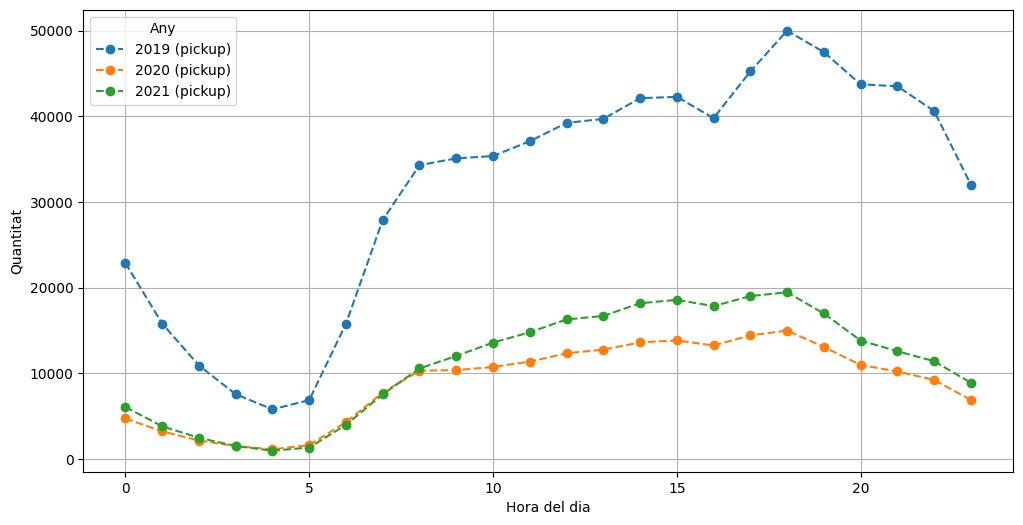

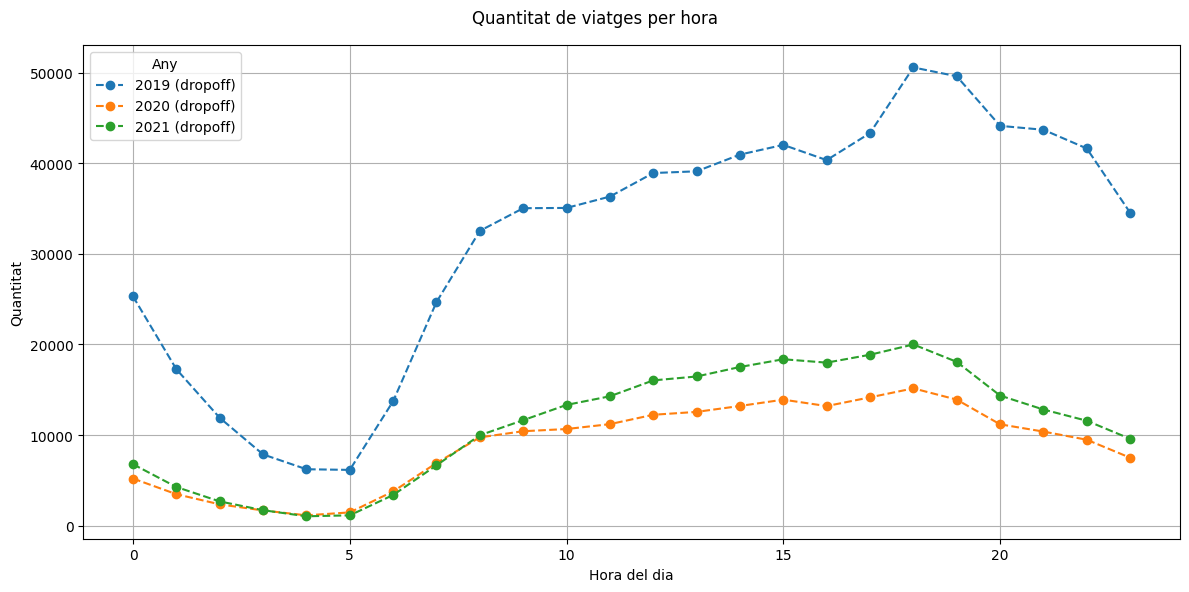

In [ ]:
def visualize_trips(df, columns, title, xlabel, ylabel):
    """
    Visualitza el nombre de viatges per diferents agregacions de dades amb línies discontínues.

    Aquesta funció crea gràfics de línia per a les columnes especificades, mostrant
    la variació en el nombre de viatges per diferents anys.

    Paràmetres:
        df (pd.DataFrame): El dataframe que conté les dades dels viatges.
        columns (list de str): Llista de columnes del dataframe que conté la informació
            que es volen visualitzar.
        title (str): El títol del gràfic.
        xlabel (str): L'etiqueta per a l'eix X.
        ylabel (str): L'etiqueta per a l'eix Y.

    Retorn:
        None: Aquesta funció no retorna cap valor. Mostra els gràfics generats.
    """
    # Iterar sobre les columnes que es volen visualitzar
    for column in columns:
        plt.figure(figsize=(12, 6))

        for year in YEARS:
            information = column.split('_')
            # Filtrar les dades per l'any corresponent
            df_filtered = df[df['tpep_dropoff_datetime'].dt.year == year]

            try:
                # Obtenir les dades segons l'agregació temporal especificada a la columna
                col_data = getattr(
                    pd.to_datetime(df_filtered['tpep_' + information[0] + '_datetime'])
                    .dt,
                    information[1]
                ).value_counts().sort_index()

            except AttributeError:
                # Tractar el cas especial quan l'agregació és 'isocalendar'
                col_data = getattr(
                    pd.to_datetime(df_filtered['tpep_' + information[0] + '_datetime'])
                    .dt.isocalendar(),
                    information[1]
                ).value_counts().sort_index()

            # Crear la línia discontínua amb punts per representar les dades
            plt.plot(
                col_data.index,
                col_data.values,
                marker='o',
                linestyle='--',
                label=f"{year} ({information[0]})"
            )

        # Configurar els eixos i la llegenda
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.legend(title='Any')
        plt.grid()

    # Configurar el títol i ajustar l'espai entre les figures
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

visualize_trips(df,
                ['pickup_hour', 'dropoff_hour'],
                title = 'Quantitat de viatges per hora',
                xlabel = 'Hora del dia', ylabel = 'Quantitat')

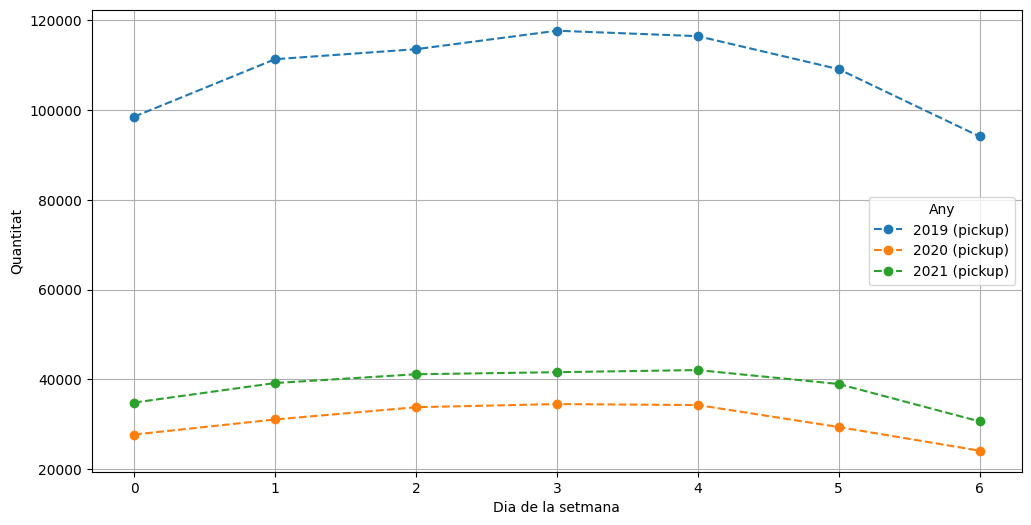

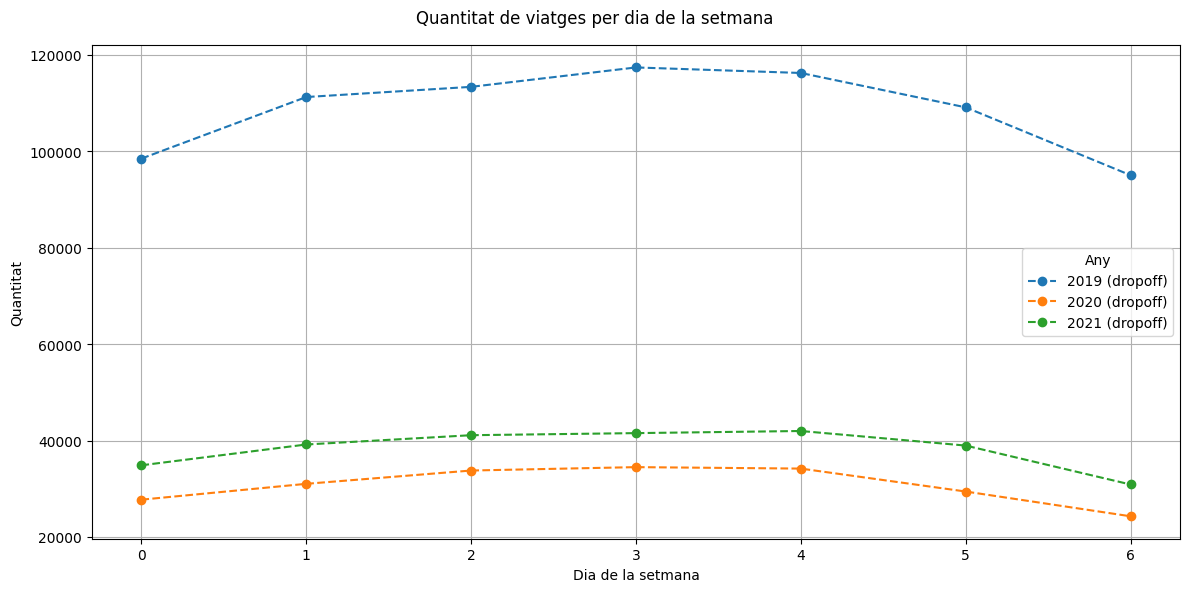

In [ ]:
visualize_trips(df,
                ['pickup_dayofweek', 'dropoff_dayofweek'],
                title = 'Quantitat de viatges per dia de la setmana',
                xlabel = 'Dia de la setmana',
                ylabel = 'Quantitat')

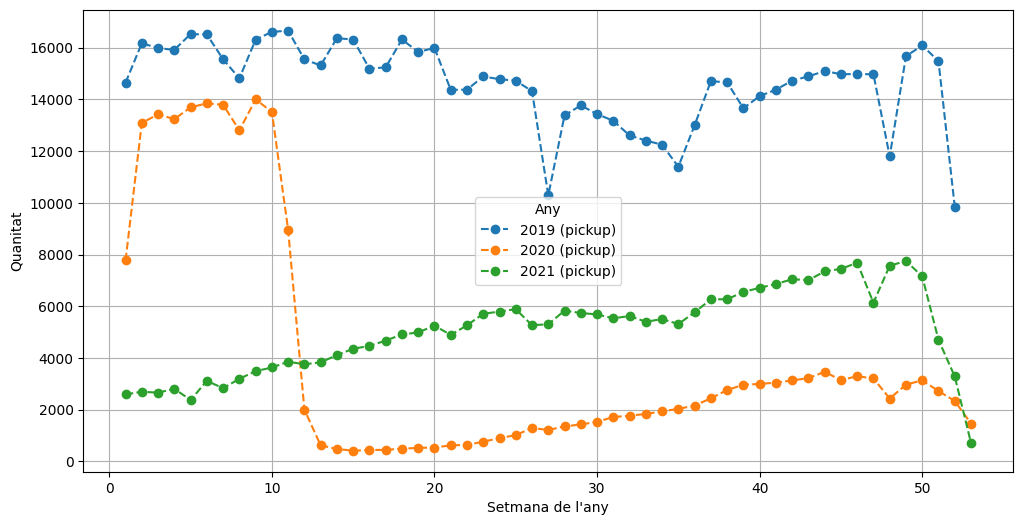

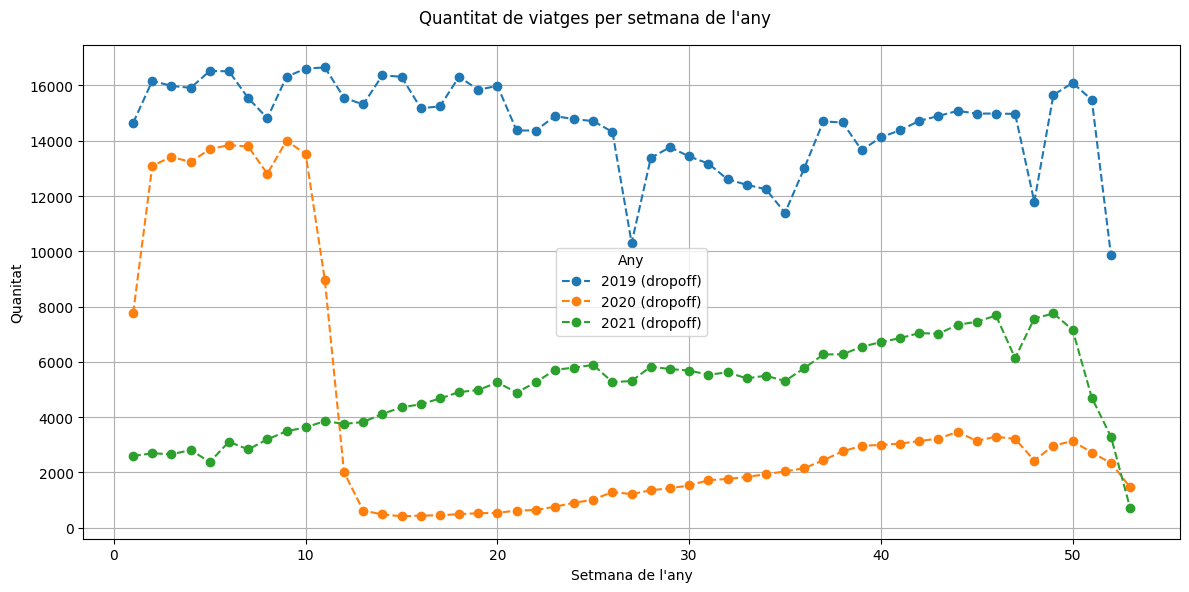

In [ ]:
visualize_trips(df,
                ['pickup_week', 'dropoff_week'],
                title = 'Quantitat de viatges per setmana de l\'any',
                xlabel = 'Setmana de l\'any',
                ylabel = 'Quanitat')

+ Com descriurieu l'efecte de la covid en cada cas (si és que en té)? Quin creieu que és el motiu?

> Resposta:

Pel que fa en el cas d'hora a hora en 2019 veiem que els patrons de desplaçaments amb taxi mantenen una corba habitual amb un increment significatiu durant les hores de major demanda, tant durant el dia com a la tarda. En el 2020 la covid va disminuir considerablement el nombre de viatges. En relació al 2019, hi ha menys viatges a totes les zones horàries, amb una disminució particularment notable en les hores de màxima demanda, a causa de les limitacions de mobilitat i la reducció de la demanda. I a 2021 tot i la millora en comparació al 2020, la quantitat de viatges continua sent inferior a la del 2019. Això indica que, malgrat un cert avenç, les repercussions de la pandèmia segueixen presents.

Per dia de setmana veiem que en el 2019 durant els dies de treball s'observa un increment de l'activitat, mentre que en el cap de setmana es nota una lleu reducció dels viatges, com és comú a les ciutats. En el 2020 la disminució és significativa cada dia de la setmana. No només es limita la mobilitat durant els dies de treball, sinó també els caps de setmana, evidenciant les limitacions provocades per la pandèmia. I en el 2021 Comença a observar-se una tendència de recuperació, particularment durant els dies de treball, però, la quantitat de viatges encara és inferior a la del 2019, cosa que suggereix que els patrons previs a la pandèmia encara no s'havien recuperat totalment.

Per últim, en quant a setmanes de l'any, en el 2019 Els desplaçaments en taxi es mantenen força constants al llarg de l'any, amb algunes variacions habituals a causa de vacances i successos específics. A 2020 a partir de la setmana 12, es produeix una reducció significativa en la quantitat de viatges, coincidint amb el començament de les accions de confinament. Des d'aquell instant, els números són baixos, amb variacions que possiblement representen períodes de relaxació i noves limitacions. I en el 2021 es nota una millora gradual en la quantitat de viatges setmanals, però encara no arriba als nivells del 2019, cosa que evidencia que els patrons de mobilitat han patit un impacte durador.

La repercussió de la COVID-19 als trasllats de taxis a Nova York ha estat notable, particularment el 2020, amb una dràstica disminució en la quantitat de viatges diaris, setmanals i anuals. Aquesta reducció es deu a les limitacions de mobilitat, a les accions de confinament i a les modificacions als patrons de desplaçament de la població. Tot i que s'observa una certa recuperació el 2021, les dades indiquen que encara no s'han recuperat els nivells d'activitat previs a la pandèmia, cosa que assenyala un impacte estès de la pandèmia als patrons de mobilitat a les ciutats.



## 5. Relació distancia, temps i velocitat

A les dades tenim la **distància** que ha recorregut el taxi en cada viatge i de la informació temporal podem extreure també la **durada** d'aquest.

Ara explorarem com la covid va afectar les distàncies i les durades dels viatges, i també la velocitat dels taxis. També ens preguntarem si la densitat de trànsit va variar.

### Exercici E

+ Per començar, escriu una funció que visualitzi els **histogrames** de distància i durada per any.

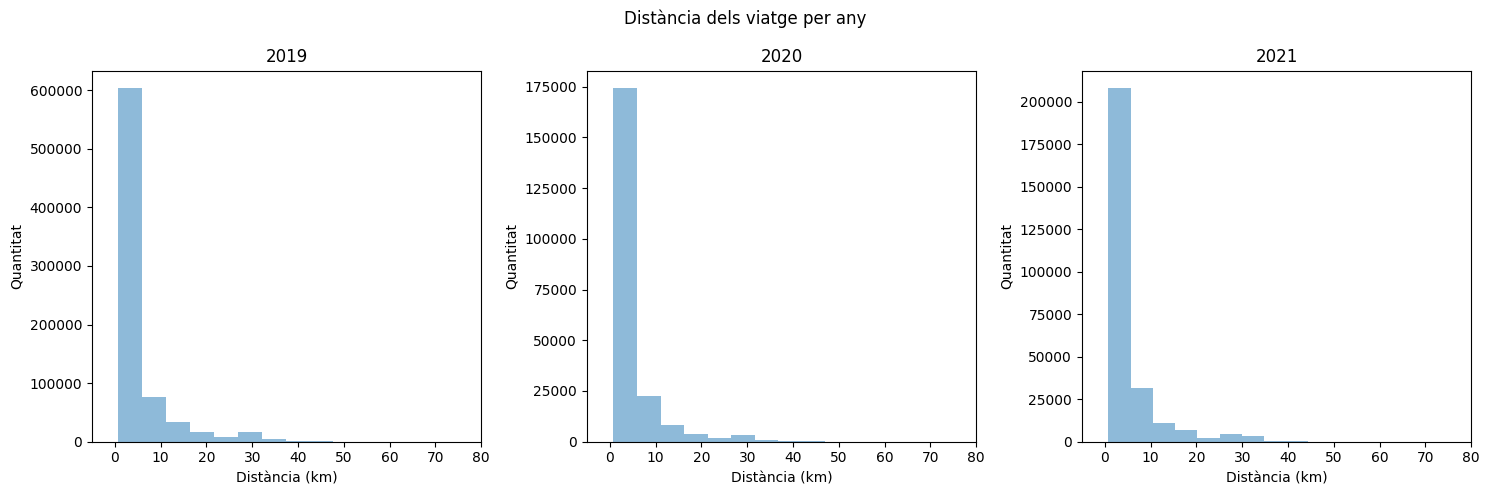

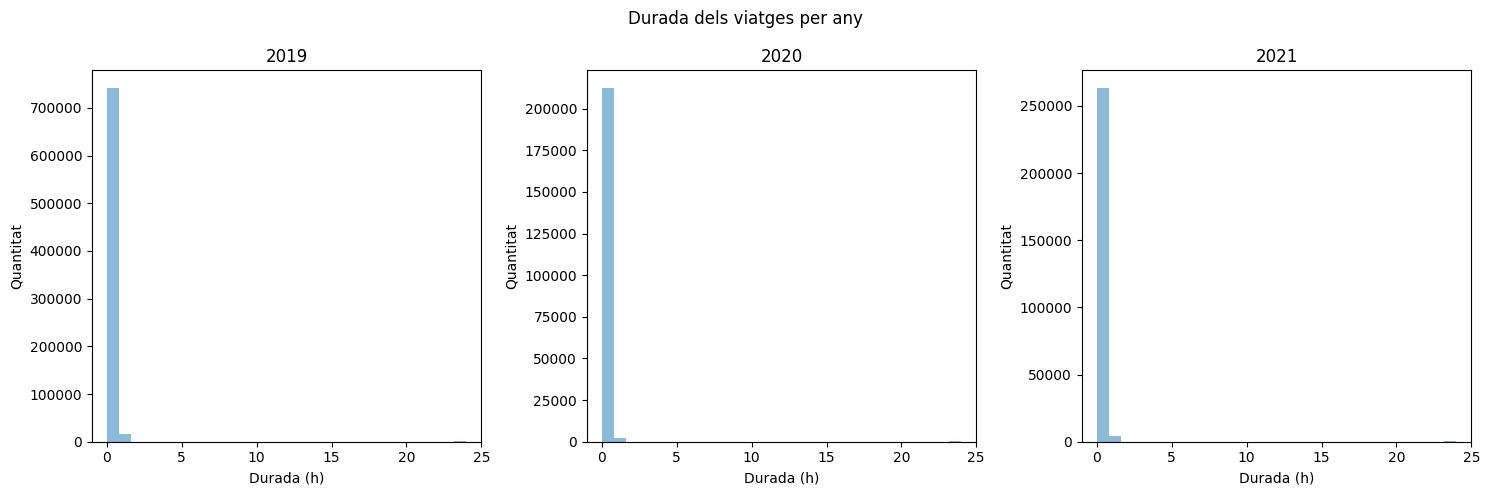

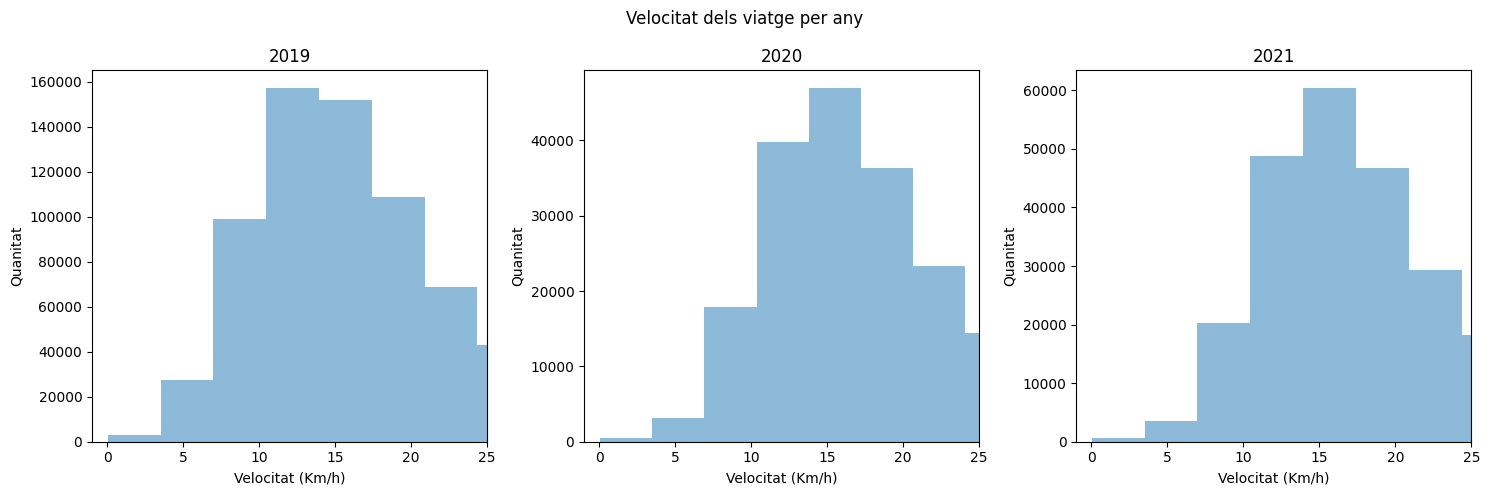

In [ ]:
def visualize_histograms(df, column, title, xlabel, ylabel, xlim):
    """
    Crea un histograma a partir de la informació continguda en una columna del dataframe.

    Paràmetres:
        df (pd.DataFrame): El dataframe que conté les dades dels viatges.
        column (str): La columna del dataframe que conté la informació a visualitzar.
        title (str): El títol del gràfic.
        xlabel (str): L'etiqueta per a l'eix X.
        ylabel (str): L'etiqueta per a l'eix Y.
        xlim (tuple): Límits per a l'eix X (mínim, màxim).

    Retorn:
        None: Aquesta funció no retorna cap valor. Mostra els gràfics generats.
    """
    plt.figure(figsize=(15, 5))

    for year in YEARS:
        plt.subplot(1, len(YEARS), YEARS.index(year) + 1)
        df_filtered = df[df['tpep_dropoff_datetime'].dt.year == year]

        # Configurar els eixos
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.xlim(xlim)
        plt.title(year)

        # Crear l'histograma amb els paràmetres especificats
        plt.hist(
            df_filtered[column],
            bins=30,
            alpha=0.5,
            histtype='stepfilled',
            edgecolor='none'
        )

    # Configurar el títol i ajustar l'espai entre subfigures
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

visualize_histograms(df, 'trip_distance', title = 'Distància dels viatge per any',
                     xlabel = 'Distància (km)', ylabel = 'Quantitat', xlim = (-5, 80))

visualize_histograms(df, 'trip_duration', title = 'Durada dels viatges per any',
                     xlabel = 'Durada (h)', ylabel = 'Quantitat', xlim = (-1, 25) )

visualize_histograms(df, 'speed', title = 'Velocitat dels viatge per any',
                     xlabel = 'Velocitat (Km/h)', ylabel = 'Quanitat', xlim = (-1, 25) )

* Com creieu que la covid va afectar les distàncies i durades dels viatges?

* I a la velocitat dels taxis?

> Resposta:

Pel que fa a les distàncies i els temps dels viatges, la COVID-19 sembla haver exercit un efecte mínim, atès que les distàncies es conserven pràcticament constants en tots els anys estudiats. Això assenyala que les limitacions de mobilitat o modificacions en la conducta dels passatgers no van tenir un impacte significatiu a les distàncies cobertes.

Pel que fa a la velocitat, no s'observen canvis notables al llarg del temps, a excepció d'un petit augment en els viatges a velocitats baixes, com 10 km/h, el 2019. Això podria indicar que la densitat de trànsit es va mantenir estable, atès que la velocitat dels taxis no va patir un impacte significatiu, cosa que assenyala que la COVID-19 no va tenir un impacte excessiu en la fluïdesa del trànsit.

+ Pregunta:

https://data.cityofnewyork.us/Transportation/NYC-Taxi-Zones/d3c5-ddgc

+ Utilitzant el DataFrame, escriu una funció que identifiqui les cinc ubicacions de recollida (PULocationID) més freqüents.
+ Per a aquestes cinc ubicacions de recollida, calcula el nombre mitjà de passatgers (passenger_count) per trajecte.
+ Filtra els trajectes on la ubicació de recollida i de deixada són la mateixa (PULocationID == DOLocationID). Calcula el percentatge d'aquests trajectes respecte al total de trajectes.

In [ ]:
def analyze_pickup_dropoff_locations(df, colum1='PULocationID', colum2='passenger_count', equalCol='DOLocationID'):
    """
    Analitza les ubicacions de recollida i deixada dels viatges.

    Aquesta funció identifica les cinc ubicacions de recollida més freqüents i calcula
    la mitjana de passatgers per a cadascuna. També calcula el percentatge de trajectes
    en què la ubicació de recollida coincideix amb la de deixada.

    Paràmetres:
        df (pd.DataFrame): El dataframe que conté les dades dels viatges.
        colum1 (str): La columna que representa les ubicacions de recollida. Per defecte és 'PULocationID'.
        colum2 (str): La columna que representa el nombre de passatgers. Per defecte és 'passenger_count'.
        equalCol (str): La columna que representa les ubicacions de deixada. Per defecte és 'DOLocationID'.

    Retorn:
        None: Aquesta funció no retorna cap valor. Mostra els resultats per pantalla.
    """
    # Obtenir les 5 ubicacions més freqüents
    five_freq = df[colum1].value_counts().head(5)

    for location in five_freq.index:
        df_filtered = df[df[colum1] == location]
        count_freq = df_filtered[colum2].mean()

        # Mostrar la mitjana de 'colum2' per ubicació
        print(f"{location} : {count_freq:.2f} nº mitjà de "+str(colum2))

    # Analitzar el nombre de trajectes en què la ubicació de recollida és igual a la de deixada
    data_igual = df[df[colum1] == df[equalCol]]
    num_iguals = data_igual.shape[0]

    total_trajectes = df.shape[0]
    percentatge = (num_iguals / total_trajectes) * 100

    # Mostrar el percentatge de trajectes amb ubicació de recollida i deixada igual
    print(f"{percentatge:.2f}% dels trajectes tenen la mateixa ubicació de recollida i deixada")


analyze_pickup_dropoff_locations(df)

237 : 1.42 nº mitjà de passenger_count
236 : 1.42 nº mitjà de passenger_count
161 : 1.46 nº mitjà de passenger_count
186 : 1.42 nº mitjà de passenger_count
162 : 1.43 nº mitjà de passenger_count
3.81% dels trajectes tenen la mateixa ubicació de recollida i deixada


In [ ]:
df.head(5)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,total_amount,trip_duration,speed
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,2.414010,151,239,1,7.0,9.95,0.111111,21.726090
1,2019-01-01 00:43:00,2019-01-01 00:52:16,1.0,2.574944,238,236,1,8.5,12.70,0.154444,16.672299
2,2019-01-01 00:30:01,2019-01-01 00:33:50,1.0,1.110445,143,239,2,5.0,6.30,0.063611,17.456771
3,2019-01-01 00:34:48,2019-01-01 00:46:16,2.0,3.234773,236,74,1,10.0,12.88,0.191111,16.926140
4,2019-01-01 00:49:44,2019-01-01 01:07:18,2.0,5.632690,263,164,1,14.5,18.95,0.292778,19.238789
